In [1]:
import optimization_SPDC_gaussain_pump as gauss_opt
import optimization_SPDC as opt
import get_initialization_cond as init
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import scipy
import jax.scipy.optimize as jax_opt

key = jax.random.PRNGKey(0) 
np.random.seed(0)

In [22]:
# power of the pump (if too high, may affect the loss function(increasing loss))
Np = 0.02
# create the frequency matrix ω-ω_mean (maybe also influences the quality of the backprop)
N = 501
wi = -7
wf = 7
x = np.linspace(wi, wf, N)
w = np.linspace(2*wi, 2*wf, 2*N)
# get the group velocities for all modes
vp = 0.1
l = 1
hermite_init_params = [2, 0.2, 0.2, jnp.pi/5]
cst_init_params = [0.1]
alpha, G, H = init.get_constants(vp, l, wi, wf, Np, N = N)
initial_value_gauss = jnp.array([1., 1., 3*jnp.pi/7])
arbitrary_seed_hermite_order_1 = init.get_initialization_array(hermite_init_params, vp, l, wi, wf, Np, method='hermite', N = N)

In [23]:
y_Ns = jnp.array([0.1, 0.5, 1, 2, 3, 4, 5])
y_K = 1
phi = 2*np.pi*np.random.random()

In [ ]:
K_values = []
gaussian_optimized_params = []
arbitrary_optimized_params = []
for i in range(len(y_Ns)):
    optimized_arbitrary_pump = (jax_opt.minimize(opt.get_loss, arbitrary_seed_hermite_order_1, args = (N, alpha, G, H, l, y_Ns[i]), method="BFGS")).x
    arbitrary_optimized_params.append(optimized_arbitrary_pump)
    K_values.append(opt.get_observables(optimized_arbitrary_pump, N, alpha, G, H, l)[1])
    print(i)

In [ ]:
plt.plot(y_Ns, K_values)

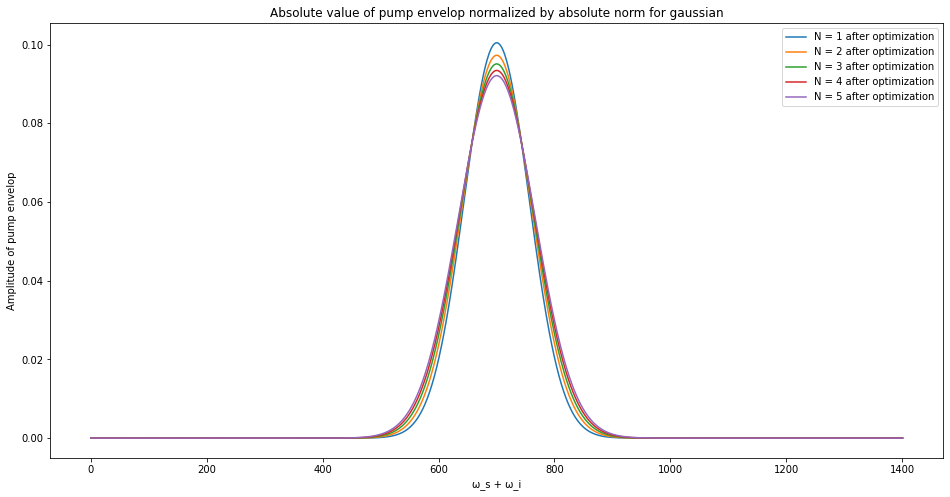

In [10]:
plt.figure(figsize = (16,8))
plt.title("Absolute value of pump envelop normalized by absolute norm for gaussian")
plt.xlabel("ω_s + ω_i")
plt.ylabel("Amplitude of pump envelop")
plt.plot(jnp.abs(gaussians[0]/(jnp.linalg.norm(gaussians[0]))), label = "N = 1 after optimization")
plt.plot(jnp.abs(gaussians[1]/(jnp.linalg.norm(gaussians[1]))), label = "N = 2 after optimization")
plt.plot(jnp.abs(gaussians[2]/(jnp.linalg.norm(gaussians[2]))), label = "N = 3 after optimization")
plt.plot(jnp.abs(gaussians[3]/(jnp.linalg.norm(gaussians[3]))), label = "N = 4 after optimization")
plt.plot(jnp.abs(gaussians[4]/(jnp.linalg.norm(gaussians[4]))), label = "N = 5 after optimization")
plt.legend()